In [80]:
import os, pathlib
from oniakExp import stats
from oniakIO import odats
from oniakPlot import hist_plot, line_plot
import numpy as np

root_path = pathlib.Path(os.getcwd()).parent
root_path

PosixPath('/media/gtnetuser/SSD_2TB_BEST/LpSubspace')

In [81]:
sj_files = [f for f in os.listdir(root_path/"result/order_preserve") if "sj" in f]
jl_files = [f for f in os.listdir(root_path/"result/order_preserve") if "jl" in f]
len(sj_files), len(jl_files)

(1000, 2000)

In [11]:
gt = odats.read_file(str(root_path/"gnd_data/enron_l1_top10.odat"))
gt = gt[1]
gt

array([ 8101,  6190,  4020,  7320,  6557, 10412,  9541,   364,  5204,
        2284], dtype=int32)

In [58]:
gt_dist = odats.read_file(str(root_path/"gnd_data/enron/enron_l1_q1.odat"))
gt_dist, gt_dist[0, 8101]

(array([[951.2747 , 905.97186, 817.82227, ..., 879.5422 , 888.2904 ,
         931.45355]], dtype=float32),
 6.0)

In [79]:
gt_dist = odats.read_file(str(root_path/"gnd_data/enron/enron_l1_q10.odat"))
dist_sorted = np.sort(gt_dist[0, :])
dist_sorted[:100]

array([579.5066 , 588.15753, 590.17566, 590.4462 , 590.7328 , 592.8133 ,
       593.10486, 593.5988 , 595.6149 , 595.95447, 596.79   , 596.8334 ,
       596.9071 , 597.659  , 597.89825, 598.66254, 598.68054, 598.8158 ,
       600.3952 , 600.4365 , 600.586  , 601.1647 , 601.4138 , 601.48914,
       601.8229 , 601.93195, 601.9435 , 602.08777, 602.14746, 602.5777 ,
       602.6263 , 602.7295 , 603.4319 , 603.54694, 604.1705 , 604.5408 ,
       604.5861 , 604.7379 , 604.81445, 604.86053, 605.04865, 605.1281 ,
       605.7198 , 605.75183, 606.37946, 606.45703, 606.6517 , 606.76056,
       607.05096, 607.4989 , 607.68024, 607.7889 , 607.93414, 607.94305,
       607.95184, 608.0066 , 608.2075 , 608.31213, 608.6435 , 608.87634,
       608.9789 , 609.10657, 609.17   , 609.1742 , 609.3298 , 609.3498 ,
       609.7574 , 609.7645 , 610.1284 , 610.2789 , 610.4961 , 610.68854,
       610.83386, 610.896  , 610.9246 , 611.04193, 611.07916, 611.0815 ,
       611.40564, 611.7389 , 611.9286 , 611.94904, 

In [61]:
dist_sorted = np.sort(gt_dist[0, :])
dist_sorted[:1000]

array([  6.     , 626.9286 , 630.2213 , 632.35834, 660.26935, 663.2854 ,
       666.57355, 668.72784, 671.14154, 672.35846, 672.6524 , 673.68964,
       673.89   , 675.86676, 677.0183 , 678.285  , 678.9846 , 680.6417 ,
       680.9951 , 682.05304, 683.3286 , 683.5665 , 683.6696 , 683.87524,
       684.6106 , 684.6551 , 685.0488 , 685.3158 , 685.71124, 686.23737,
       686.4471 , 686.6187 , 686.62506, 687.03394, 687.55273, 688.13245,
       688.37274, 688.7801 , 688.8702 , 689.59357, 689.81665, 689.9561 ,
       690.0419 , 690.5435 , 691.1127 , 691.1661 , 691.47235, 691.62897,
       692.0593 , 692.32806, 692.4845 , 692.49243, 692.86206, 692.9372 ,
       693.1478 , 693.608  , 694.242  , 694.4073 , 694.4974 , 694.91766,
       695.0112 , 695.4155 , 695.70465, 695.95447, 696.0678 , 696.1339 ,
       696.2071 , 696.3515 , 696.45197, 696.5263 , 696.6771 , 696.84   ,
       696.8999 , 697.5535 , 697.7517 , 698.34045, 698.3605 , 698.3838 ,
       698.5844 , 698.7329 , 698.7338 , 698.81726, 

In [90]:
def get_pos(files, idx, q):
    result = np.zeros((len(idx), len(files)), dtype=np.int32)
    print(result.shape)
    cnt = 0
    for f in files:
        if "q{}.odat".format(q) not in f:
            continue
        data = odats.read_file(str(root_path/"result/order_preserve"/f))
        for k, cid in enumerate(idx):
            result[k, cnt] = np.sum(data <= data[0, cid])
        cnt += 1
            # if cid is smallest, return 1, second smallest, 2 etc.
    return result[:, :cnt]

In [91]:
jl_pos = get_pos(jl_files, gt, 1)
jl_pos.shape

(10, 2000)


(10, 1000)

In [48]:
sj_pos = get_pos(sj_files, gt)
jl_pos = get_pos(jl_files, gt)


(10, 1000)
sj_s1016996913_q1.odat
sj_s1018329243_q1.odat
sj_s1018347227_q1.odat
sj_s1022043917_q1.odat
sj_s1030734133_q1.odat
sj_s1032505340_q1.odat
sj_s1043794052_q1.odat
sj_s10443076_q1.odat
sj_s1046600616_q1.odat
sj_s1054997155_q1.odat
sj_s1068090307_q1.odat
sj_s106817479_q1.odat
sj_s1068425182_q1.odat
sj_s1070206594_q1.odat
sj_s1074344248_q1.odat
sj_s1076077829_q1.odat
sj_s1081029888_q1.odat
sj_s1083143543_q1.odat
sj_s1084093699_q1.odat
sj_s1088752573_q1.odat
sj_s3202364507_q1.odat
sj_s3203674616_q1.odat
sj_s3209734197_q1.odat
sj_s3210094013_q1.odat
sj_s3211635443_q1.odat
sj_s321318807_q1.odat
sj_s3215491395_q1.odat
sj_s3217201379_q1.odat
sj_s3218891236_q1.odat
sj_s3229958274_q1.odat
sj_s3233276002_q1.odat
sj_s3234416433_q1.odat
sj_s3234780723_q1.odat
sj_s3240912785_q1.odat
sj_s324568995_q1.odat
sj_s3245962359_q1.odat
sj_s3248611230_q1.odat
sj_s3249018122_q1.odat
sj_s3252844254_q1.odat
sj_s4046261853_q1.odat
sj_s4047706336_q1.odat
sj_s4054965253_q1.odat
sj_s405901945_q1.odat
sj_s40

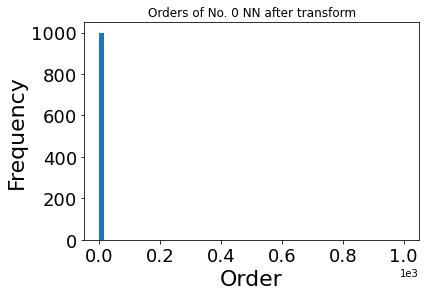

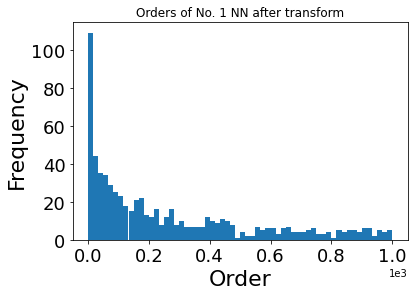

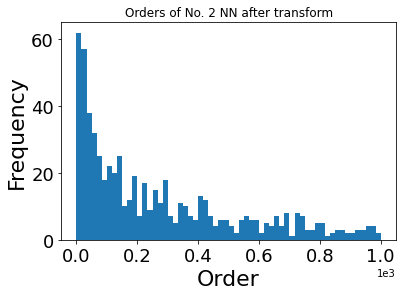

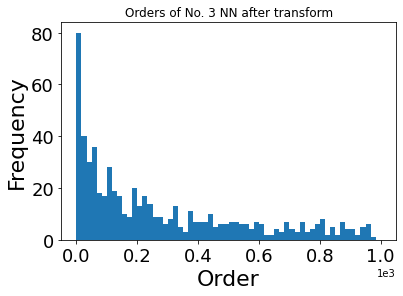

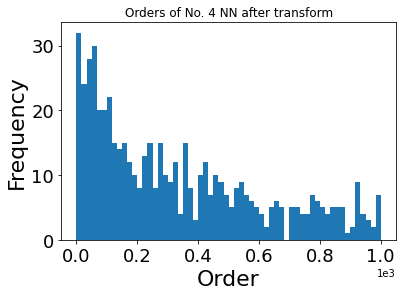

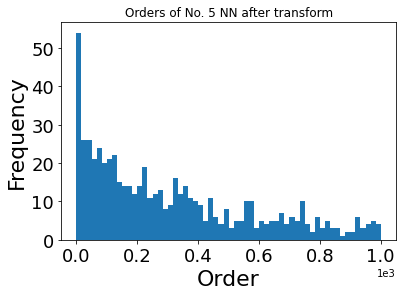

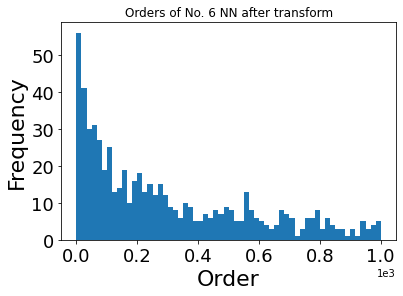

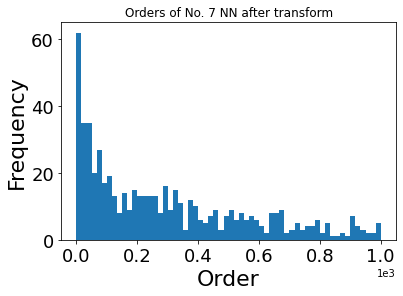

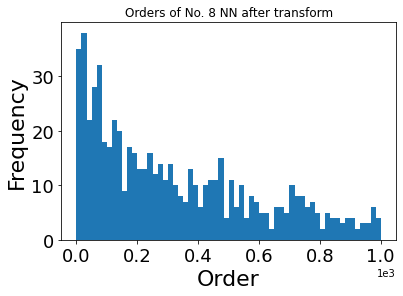

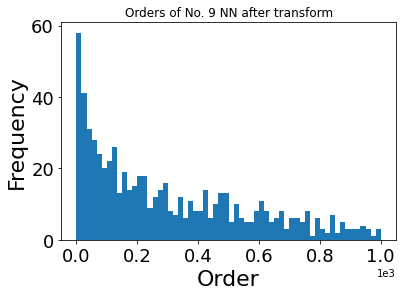

In [62]:
for i in range(10):
    hist_plot.plot_result(sj_pos[i, :], xlabel="Order", ylabel="Frequency", 
                      figtitle="Orders of No. {} NN after transform".format(i), limits=[0, 1000], nbins=60)

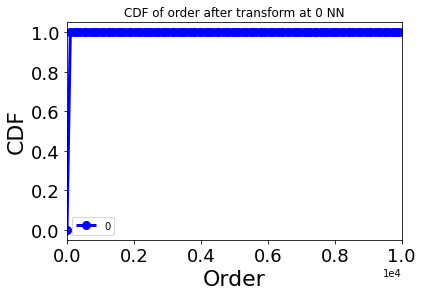

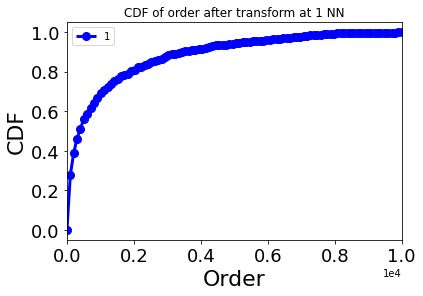

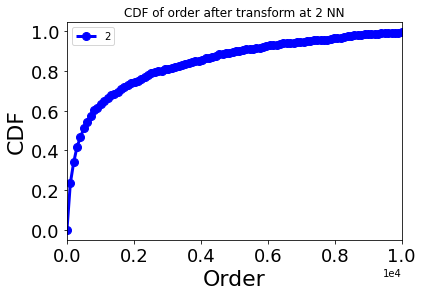

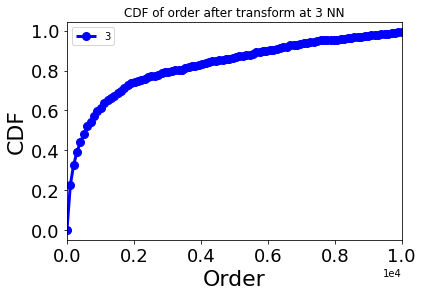

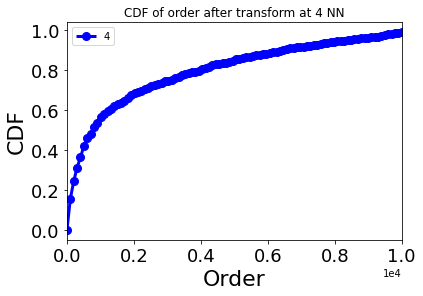

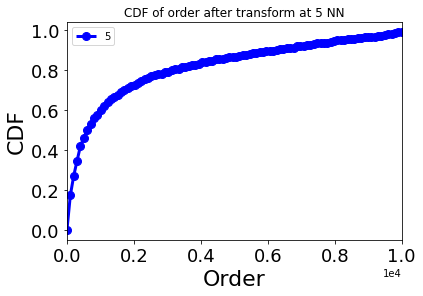

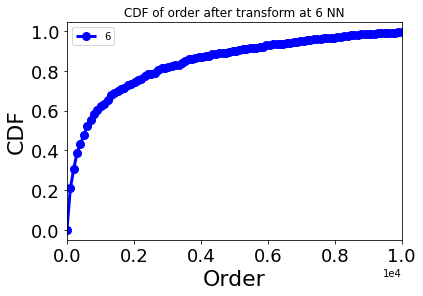

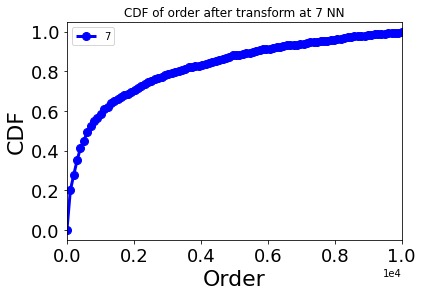

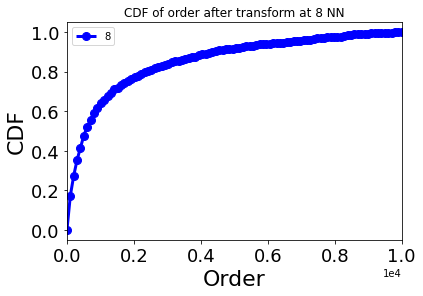

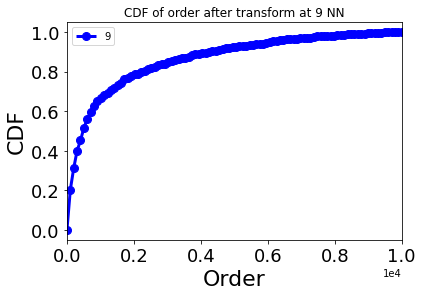

In [74]:
nbins = 100
far_pos = 10000
sj_cdf = np.empty((10, nbins))
for i in range(10):
    sj_cdf[i] = stats.cdf(sj_pos[i, :], limits=[0, far_pos], nbins=nbins)
for i in range(10):
    line_plot.plot_result([[np.linspace(0, far_pos, nbins), sj_cdf[i]]], 
                      line_names=[str(i)], xlabel="Order", ylabel="CDF", legend_pos="best",
                      figtitle="CDF of order after transform at {} NN".format(i), limx=[0, far_pos], savepath="")

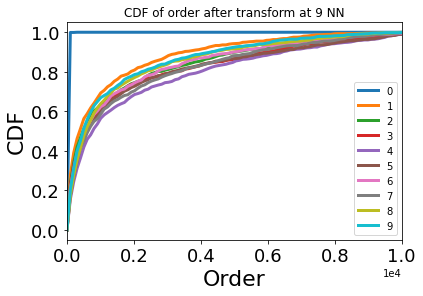

In [76]:
import importlib

importlib.reload(line_plot)
line_plot.plot_result([[np.linspace(0, far_pos, nbins), sj_cdf[i]] for i in range(10)], 
                      line_names=[str(i) for i in range(10)], xlabel="Order", ylabel="CDF", legend_pos="best",
                      figtitle="CDF of order after transform at {} NN".format(i), limx=[0, far_pos], savepath="/media/mydrive_2/Dropbox (GaTech)/lpsubspace/figs/sj_order.pdf")

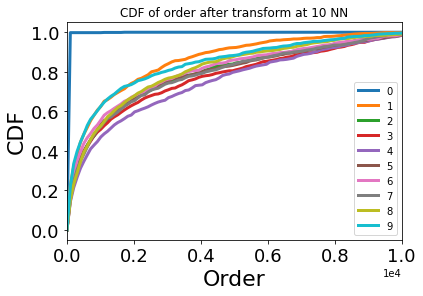

In [93]:
nbins = 100
far_pos = 10000
jl_cdf = np.empty((10, nbins))
for i in range(10):
   jl_cdf[i] = stats.cdf(jl_pos[i, :], limits=[0, far_pos], nbins=nbins)
line_plot.plot_result([[np.linspace(0, far_pos, nbins), jl_cdf[i]] for i in range(10)], 
                      line_names=[str(i) for i in range(10)], xlabel="Order", ylabel="CDF", legend_pos="best",
                      figtitle="CDF of order after transform at {} NN".format(10), limx=[0, far_pos], savepath="/media/mydrive_2/Dropbox (GaTech)/lpsubspace/figs/jl_order.pdf")

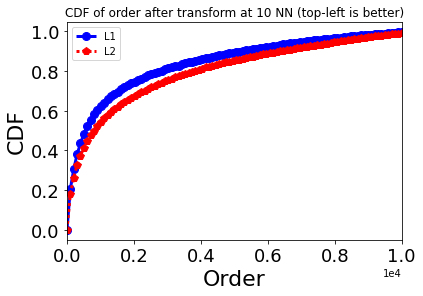

In [96]:
line_plot.plot_result([[np.linspace(0, far_pos, nbins), np.mean(sj_cdf[1:11, :], axis=0)],
                        [np.linspace(0, far_pos, nbins), np.mean(jl_cdf[1:11, :], axis=0)]  ], 
                      line_names=["L1", "L2"], xlabel="Order", ylabel="CDF", legend_pos="best",
                      figtitle="CDF of order after transform at {} NN (top-left is better)".format(10), limx=[0, far_pos], savepath="/media/mydrive_2/Dropbox (GaTech)/lpsubspace/figs/jl_order.pdf")